# Unity ML-Agents Toolkit
##  Gym Wrapper Basics
This notebook contains a walkthrough of the basic functions of the Python Gym Wrapper for the Unity ML-Agents toolkit. For instructions on building a Unity environment, see [here](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Getting-Started-with-Balance-Ball.md).

## Single-Agent Environments

The first five steps show how to use the `UnityEnv` wrapper with single-agent environments. See below step five for how to use with multi-agent environments.

### 1. Load dependencies

The following loads the necessary dependencies and checks the Python version (at runtime). ML-Agents Toolkit (v0.3 onwards) requires Python 3.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from gym_unity.envs import UnityEnv

%matplotlib inline

print("Python version:")
print(sys.version)

# check Python version
if (sys.version_info[0] < 3):
    raise Exception("ERROR: ML-Agents Toolkit (v0.3 onwards) requires Python 3")

Python version:
3.6.5 (default, Jun 17 2018, 12:13:06) 
[GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]


### 2. Start the environment
`UnityEnv` launches and begins communication with the environment when instantiated. We will be using the `GridWorld` environment. You will need to create an `envs` directory within the  `/python` subfolder of the repository, and build the GridWorld environment to that directory. For more information on building Unity environments, see [here](../docs/Learning-Environment-Executable.md).

In [2]:
env_name = "../envs/GridWorld"  # Name of the Unity environment binary to launch
env = UnityEnv(env_name, worker_id=0, use_visual=True)

# Examine environment parameters
print(str(env))

INFO:mlagents.envs:Connected new brain:
GridWorld
INFO:gym_unity:1 agents within environment.


<UnityEnv instance>


### 3. Examine the observation and state spaces
We can reset the environment to be provided with an initial observation of the environment.

Agent observations look like:


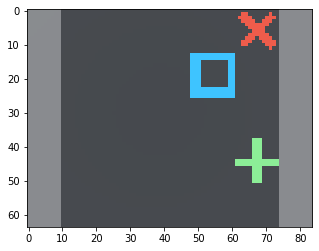

In [3]:
# Reset the environment
initial_observation = env.reset()

if len(env.observation_space.shape) == 1:
    # Examine the initial vector observation
    print("Agent state looks like: \n{}".format(initial_observation))
else:
    # Examine the initial visual observation
    print("Agent observations look like:")
    if env.observation_space.shape[2] == 3:
        plt.imshow(initial_observation[:,:,:])
    else:
        plt.imshow(initial_observation[:,:,0])

### 4. Take random actions in the environment
Once we restart an environment, we can step the environment forward and provide actions to all of the agents within the environment. Here we simply choose random actions using the `env.action_space.sample()` function.

Once this cell is executed, 10 messages will be printed that detail how much reward will be accumulated for the next 10 episodes. The Unity environment will then pause, waiting for further signals telling it what to do next. Thus, not seeing any animation is expected when running this cell.

In [4]:
for episode in range(10):
    initial_observation = env.reset()
    done = False
    episode_rewards = 0
    while not done:
        observation, reward, done, info = env.step(env.action_space.sample())
        episode_rewards += reward
    print("Total reward this episode: {}".format(episode_rewards))

Total reward this episode: -0.1099999975413084
Total reward this episode: -0.1099999975413084
Total reward this episode: 0.9000000022351742
Total reward this episode: -1.0999999977648258
Total reward this episode: -0.1099999975413084
Total reward this episode: -1.0199999995529652
Total reward this episode: -0.1099999975413084
Total reward this episode: -0.1099999975413084
Total reward this episode: -0.1099999975413084
Total reward this episode: -0.1099999975413084


### 5. Close the environment when finished
When we are finished using an environment, we can close it with the function below.

In [5]:
env.close()

INFO:mlagents.envs:Environment shut down with return code 0.


## Multi-Agent Environments

It is also possible to use the gym wrapper with multi-agent environments. For these environments, observations, rewards, and done flags will be provided in a list. Likewise, the environment will expect a list of actions when calling `step(action)`.

### 1. Start the environment

We will use the `3DBall` environment for this walkthrough. For more information on building Unity environments, see [here](../docs/Learning-Environment-Executable.md). We will launch it from the `python/envs` sub-directory of the repo. Please create an `envs` folder if one does not already exist.

In [6]:
# Name of the Unity environment binary to launch
multi_env_name = "../envs/3DBall"  
multi_env = UnityEnv(multi_env_name, worker_id=1, 
                     use_visual=False, multiagent=True)

# Examine environment parameters
print(str(multi_env))

INFO:mlagents.envs:Connected new brain:
3DBall
INFO:gym_unity:12 agents within environment.


<UnityEnv instance>


### 2. Examine the observation space 

In [7]:
# Reset the environment
initial_observations = multi_env.reset()

if len(multi_env.observation_space.shape) == 1:
    # Examine the initial vector observation
    print("Agent observations look like: \n{}".format(initial_observations[0]))
else:
    # Examine the initial visual observation
    print("Agent observations look like:")
    if multi_env.observation_space.shape[2] == 3:
        plt.imshow(initial_observations[0][:,:,:])
    else:
        plt.imshow(initial_observations[0][:,:,0])

Agent observations look like: 
[-0.04583858 -0.02706882 -1.4387455   3.9411402   0.979342    0.
 -0.981       0.        ]


### 3. Take random steps in the environment

In [8]:
for episode in range(10):
    initial_observation = multi_env.reset()
    done = False
    episode_rewards = 0
    while not done:
        actions = [multi_env.action_space.sample() for agent in range(multi_env.number_agents)]
        observations, rewards, dones, info = multi_env.step(actions)
        episode_rewards += np.mean(rewards)
        done = dones[0]
    print("Total reward this episode: {}".format(episode_rewards))

Total reward this episode: 1.59166672360152
Total reward this episode: 1.2333333566784859
Total reward this episode: 1.433333346620202
Total reward this episode: 1.3833333905786276
Total reward this episode: 1.0083333496004343
Total reward this episode: 1.1750000240281224
Total reward this episode: 1.2916667247191072
Total reward this episode: 1.0250000301748514
Total reward this episode: 1.2250000331550837
Total reward this episode: 0.9750000406056643


### 4. Close the environment

In [9]:
multi_env.close()

INFO:mlagents.envs:Environment shut down with return code 0.
